## Robot Kinematics Using Transformation Matrices

In this notebook:
- Transformation matrices help compute positions of joints and the end-effector (2d-planar robot)

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Define Link Lengths and Joint Angles

In [38]:
L1 = 1
L2 = 1

theta1 = np.radians(45)  # joint1
theta2 = np.radians(45)  # joint2

### Define 2D Homogeneous Transformation Matrices

A homogeneous transformation matrix in 2D combines rotation and translation:

```
[ cosθ  -sinθ  tx ]
[ sinθ   cosθ  ty ]
[  0      0    1 ]
```
Where `(tx, ty)` is the translation.

In [39]:
# 2D homogeneous transform: rotate theta, translate along rotated X by L
def T2D(theta, L):
    return np.array([
        [np.cos(theta), -np.sin(theta), L*np.cos(theta)],
        [np.sin(theta),  np.cos(theta), L*np.sin(theta)],
        [0, 0, 1]
    ])


### Compute Transformations
- `BASE_T_JOINT1`: from base to joint1
- `JOINT1_T_JOINT2`: from joint1 to joint2 (end-effector)
- `BASE_T_JOINT2`: from base to end-effector

In [40]:
# Base to Joint1
BASE_T_JOINT1 = T2D(theta1, L1)

# Joint1 to Joint2 (end-effector)
JOINT1_T_JOINT2 = T2D(theta2, L2)

# Base to Joint2 (end-effector) by multiplying matrices
BASE_T_JOINT2 = BASE_T_JOINT1 @ JOINT1_T_JOINT2

print("BASE_T_JOINT1:\n", BASE_T_JOINT1)
print("\nJOINT1_T_JOINT2:\n", JOINT1_T_JOINT2)
print("\nBASE_T_JOINT2:\n", BASE_T_JOINT2)

BASE_T_JOINT1:
 [[ 0.70710678 -0.70710678  0.70710678]
 [ 0.70710678  0.70710678  0.70710678]
 [ 0.          0.          1.        ]]

JOINT1_T_JOINT2:
 [[ 0.70710678 -0.70710678  0.70710678]
 [ 0.70710678  0.70710678  0.70710678]
 [ 0.          0.          1.        ]]

BASE_T_JOINT2:
 [[ 0.         -1.          0.70710678]
 [ 1.          0.          1.70710678]
 [ 0.          0.          1.        ]]


### Extract Positions for Plotting
The positions of joints can be read from the last column (top right, middle right) of the transformation matrices.

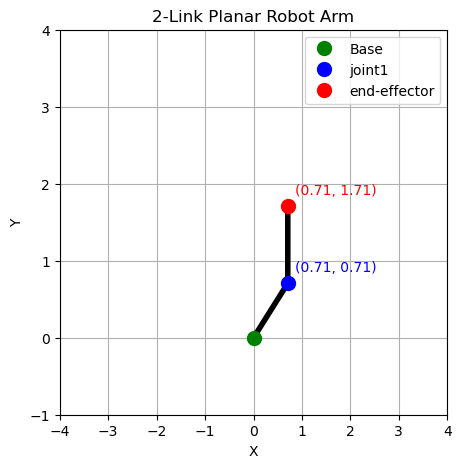

In [41]:
x0, y0 = 0, 0
x1, y1 = BASE_T_JOINT1[0,2], BASE_T_JOINT1[1,2]
x2, y2 = BASE_T_JOINT2[0,2], BASE_T_JOINT2[1,2]

# Plot the robot arm
plt.figure(figsize=(5,5))
plt.plot([x0, x1, x2], [y0, y1, y2], '-k', linewidth=4, markersize=10)
plt.plot(x0, y0, 'go', markersize=10, label='Base')
plt.plot(x1, y1, 'bo', markersize=10, label='joint1')
plt.plot(x2, y2, 'ro', markersize=10, label='end-effector')
plt.xlim(-4, 4)
plt.ylim(-1, 4)
plt.title('2-Link Planar Robot Arm')
plt.text(x1 + 0.15, y1 + 0.15, f'({x1:.2f}, {y1:.2f})', color='blue')
plt.text(x2 + 0.15, y2 + 0.15, f'({x2:.2f}, {y2:.2f})', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.show()

### Key Takeaways
- Each joint has a transformation matrix relative to its parent.
- Chaining matrices (`@` multiplication) gives the total transformation from base to any link.
- The end-effector position is extracted directly from the last column of the matrix.